In [24]:
import sys
sys.path.append('/home/aseem/projects/ud120-projects/choose_your_own')
sys.path.append("/home/aseem/projects/website/udacity_data_science_notes/intro_machine_learning")

%matplotlib inline

def show_picture():
    from ipython_picture import prettyPicture
    
    plt = prettyPicture(clf, features_test, labels_test)
    plt.show()
    
def show_accuracy():
    from sklearn.metrics import accuracy_score
    
    acc = accuracy_score(clf.predict(features_test), labels_test)
    print acc

# Lesson 3 - Decision Trees

![](wind_surf.png)

Allows you to ask multiple linear questions one after the other

![](decision_tree.png)

![](decision_tree2.png)

![](decision_tree3.png)

![](decision_tree4.png)

In [25]:
from sklearn import tree

X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [26]:
clf.predict([[2., 2.]])

array([1])

In [27]:
from prep_terrain_data import makeTerrainData

features_train, labels_train, features_test, labels_test = makeTerrainData()

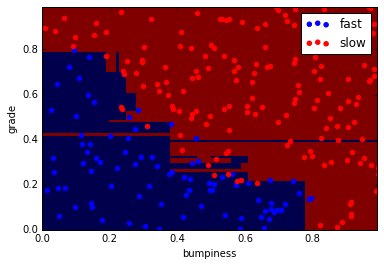

0.908


In [37]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)

show_picture()
show_accuracy()

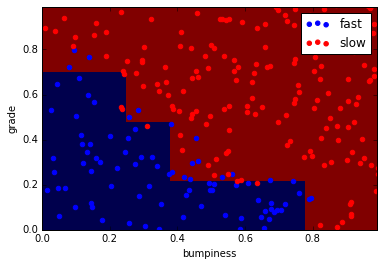

0.912


In [38]:
clf = tree.DecisionTreeClassifier(min_samples_split = 50)
clf = clf.fit(features_train, labels_train)

show_picture()
show_accuracy()

## Entropy
- controls how a decision tree decides where to split the data

![](speed_limit.png)

Decision tree tries to split the data so that we have regions which are as pure as possible. Recursively doing this decision tree is able to make its decisions

![](entropy.png)

In [40]:
import math

-0.5 * math.log(0.5, 2) -0.5 * math.log(0.5, 2)

1.0

## Information Gain

information gain = entropy of parent - [weighted average] of entropy of children

decision tree algorithm tries to maximize the information gain


We have entropy of 1.0. We will try and make a decision boundary by splitting according to grade

![](entropy_by_grade.png)

In [46]:
p_s = 2/3.0
p_f = 1 - p_s

entropy_steep = - p_s * math.log(p_s, 2) - p_f * math.log(p_f, 2)
entropy_flat = 0.0

entropy_children = (3/4.0) * entropy_steep + (1/4.0) * entropy_flat

entropy_gain = 1 - entropy_children
entropy_gain

0.31127812445913283

## Bias and Variance

A biased machine learning algorithm is the one which ignores the data. It has no capacity to learn.

The opposite is a machine learning algorithm with very high variance. It can only act on the data that it has seen before. The problem with this is that it won't be able to react to new stuff. It does not have the bias to act in a way.

We need something in the middle. Tweaking this bias-variance tradeoff makes machine learning amazing.

## Decision Tress Pros and Cons

Pros
- Easy to use 
- Allow you to graphically interpret the data
- can build bigger classifiers - something called ensemble methods

Cons
- prone to overfitting. mainly when you have lots and lots of features
- need to ensure that the growth of the tree is stopped at the appropriate time to avoid overfitting. 